# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["lenaRGB.png", "lenaRGBSzum.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def color_median_filter(img, window_size):
    if window_size % 2 == 0:
        window_size = window_size + 1

    pad = window_size // 2
    height, width = img.shape[:2]
    result = np.zeros_like(img)

    for i in range(pad, height - pad):
        for j in range(pad, width - pad):
            window = img[i-pad:i+pad+1, j-pad:j+pad+1]
            distances = np.zeros(window_size * window_size)

            for idx, (y, x) in enumerate(np.ndindex(window_size, window_size)):
                pixel = window[y, x]
                diff = window - pixel
                squared_diff = np.square(diff)
                distances[idx] = np.sqrt(np.sum(squared_diff, axis=2)).sum()

            min_idx = np.argmin(distances)
            y, x = np.unravel_index(min_idx, (window_size, window_size))
            result[i, j] = window[y, x]

    return result

In [3]:
def process_and_display(filename, window_size=3):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    filtered = color_median_filter(img, window_size)

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(filtered)
    plt.title(f'Median Filtered (window={window_size}x{window_size})')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

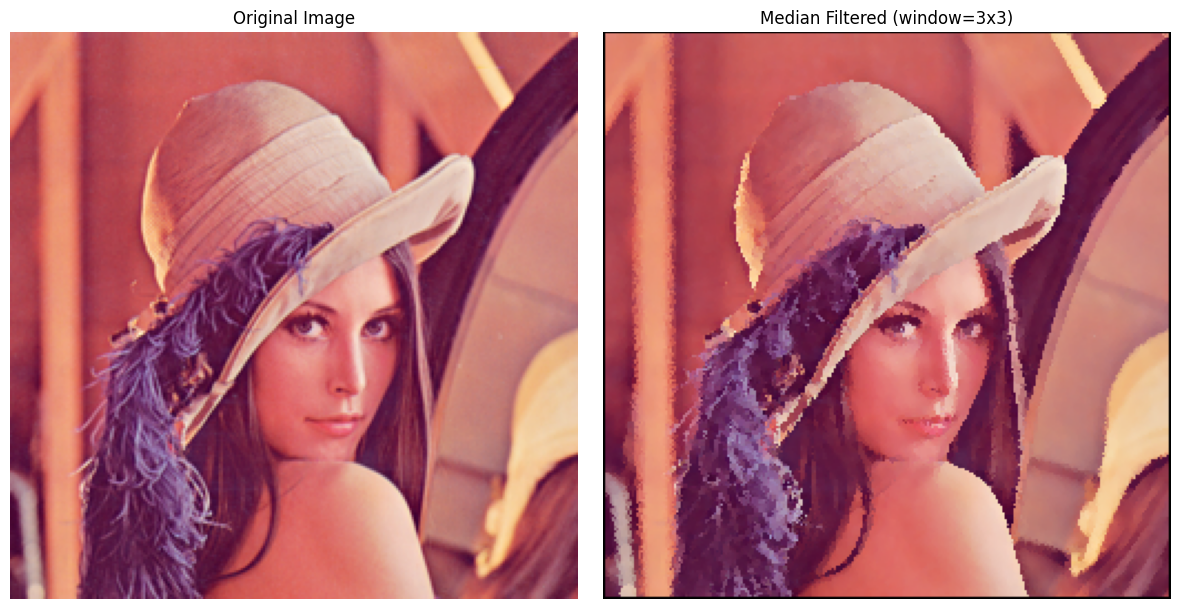

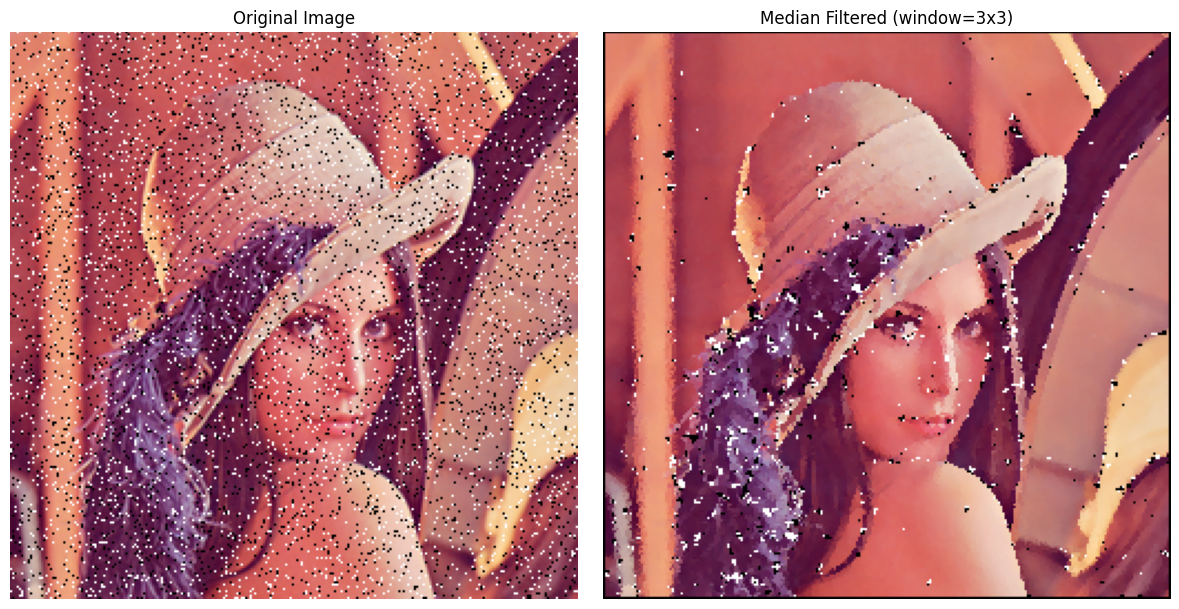

In [4]:
process_and_display('../todo/lenaRGB.png')
process_and_display('../todo/lenaRGBSzum.png')